In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent

In [2]:
def GradientDescent(function, d_function, n_iter, learning_rate, x_init, momentum=0.9):
    log_x = list()
    log_y = list()
    log_x.append(x_init)
    log_y.append(function(*x_init))

    # intial parameters
    change = [0.0 for _ in range(len(x_init))]
    x = x_init.copy()
    # iteration starts
    for _ in range(n_iter):
        for i, grad in enumerate(d_function(*x)):
            new_change = learning_rate*grad + momentum*change[i]
            x[i] -= new_change
            change[i] = new_change

        log_x.append(x.copy())
        log_y.append(function(*x))

    minimum = log_x[-1].copy()
    minimum.append(log_y[-1])
    minimum = np.array(minimum)
    return log_x, log_y, minimum

# AdaGrad

In [3]:
def AdaGrad(function, d_function, n_iter, learning_rate, x_init):
    log_x = list()
    log_y = list()
    log_x.append(x_init)
    log_y.append(function(*x_init))

    # intial parameters
    alpha = [0.0 for _ in range(len(x_init))]
    x = x_init.copy()
    # iteration starts
    for _ in range(n_iter):
        for i, grad in enumerate(d_function(*x)):
            alpha[i] += grad**2
            clr = learning_rate/(np.sqrt(alpha[i]) + 1e-8)
            x[i] -= clr*grad

        log_x.append(x.copy())
        log_y.append(function(*x))

    minimum = log_x[-1].copy()
    minimum.append(log_y[-1])
    minimum = np.array(minimum)
    return log_x, log_y, minimum

# AdaDelta

In [4]:
def AdaDelta(function, d_function, n_iter, x_init, rho=0.99, ep=1e-3):
    log_x = list()
    log_y = list()
    log_x.append(x_init)
    log_y.append(function(*x_init))

    # intial parameters
    accumulate = [0.0 for _ in range(len(x_init))]
    update = [0.0 for _ in range(len(x_init))]
    x = x_init.copy()
    # iteration starts
    for _ in range(n_iter):
        for i, grad in enumerate(d_function(*x)):
            accumulate[i] = (rho*accumulate[i]) + ((1 - rho)*grad**2)
            new_update = np.sqrt(update[i] + ep)/np.sqrt(accumulate[i] + ep)*grad
            update[i] = update[i]*rho + (1 - rho)*new_update**2
            x[i] -= new_update

        log_x.append(x.copy())
        log_y.append(function(*x))

    minimum = log_x[-1].copy()
    minimum.append(log_y[-1])
    minimum = np.array(minimum)
    return log_x, log_y, minimum

# RMSProp

In [5]:
def RMSProp(function, d_function, n_iter, learning_rate, x_init, rho=0.99):
    log_x = list()
    log_y = list()
    log_x.append(x_init)
    log_y.append(function(*x_init))

    # intial parameters
    alpha = [0.0 for _ in range(len(x_init))]
    x = x_init.copy()

    # iteration starts
    for _ in range(n_iter):
        for i, grad in enumerate(d_function(*x)):
            alpha[i] = (alpha[i]*rho) + ((1 - rho)*grad**2)
            clr = learning_rate/(np.sqrt(alpha[i]) + 1e-8)
            x[i] -= clr*grad

        log_x.append(x.copy())
        log_y.append(function(*x))

    minimum = log_x[-1].copy()
    minimum.append(log_y[-1])
    minimum = np.array(minimum)
    return log_x, log_y, minimum

# Adam

In [6]:
def Adam(function, d_function, n_iter, learning_rate, x_init, beta1=0.9, beta2=0.999, epsilon=1e-8):
    log_x, log_y = list(), list()
    log_x.append(x_init)
    log_y.append(function(*x_init))

    # Initialization
    m = [0. for _ in range(len(x_init))]
    v = [0. for _ in range(len(x_init))]
    x = x_init.copy()

    #iteration
    for _ in range(n_iter):
        for i, gradient in enumerate(d_function(*x)):
            mt = (beta1*m[i]) + (1.0 - beta1)*gradient
            vt = (beta2*v[i]) + (1.0 - beta2)*np.square(gradient)
            m_hat = mt/(1.0 - beta1**(i + 1))
            v_hat = vt/(1.0 - beta2**(i + 1))
            x[i] = x[i] - learning_rate*m_hat/(np.sqrt(v_hat) + epsilon)
            m[i] = mt
            v[i] = vt

        log_x.append(x.copy())
        log_y.append(function(*x))

    minimum = log_x[-1].copy()
    minimum.append(log_y[-1])
    minimum = np.array(minimum)
    return log_x, log_y, minimum

### Creatind Data (2D)

In [7]:
def function(x):
    return -np.cos(x) - np.sin(x) - 5/2*np.cos(2*x) + 1/2*np.sin(2*x)

def d_function(x):
    return [np.sin(x) - np.cos(x) + 5*np.sin(2*x) + np.cos(2*x)]

In [8]:
x_init = [4.7]
lr = 0.1

xs_gd, ys_gd, minimum_gd = GradientDescent(function=function,
                         d_function=d_function,
                         n_iter=250,
                         learning_rate=lr*0.1,
                         momentum=0.9,
                         x_init=x_init,
)

xs_ag, ys_ag, minimum_ag = AdaGrad(function=function,
                         d_function=d_function,
                         n_iter=250,
                         learning_rate=lr,
                         x_init=x_init,
)

xs_ad, ys_ad, minimum_ad = AdaDelta(function=function,
                         d_function=d_function,
                         n_iter=250,
                         x_init=x_init,
)

xs_rp, ys_rp, minimum_rp = RMSProp(function=function,
                         d_function=d_function,
                         n_iter=250,
                         learning_rate=lr*0.1,
                         x_init=x_init,
                         rho=0.99
)


xs_am, ys_am, minimum_am = Adam(function=function,
                         d_function=d_function,
                         n_iter=250,
                         learning_rate=lr,
                         x_init=x_init,
)

In [9]:
print('Gradient Descent', minimum_gd)
print('AdaGrad', minimum_ag)
print('AdaDelta', minimum_ad)
print('RMSProp', minimum_rp)
print('Adam', minimum_am)

Gradient Descent [ 6.28318242 -3.5       ]
AdaGrad [ 6.28259903 -3.49999811]
AdaDelta [ 6.28318531 -3.5       ]
RMSProp [ 6.28318448 -3.5       ]
Adam [ 6.28318738 -3.5       ]


All were able to find the minimum!

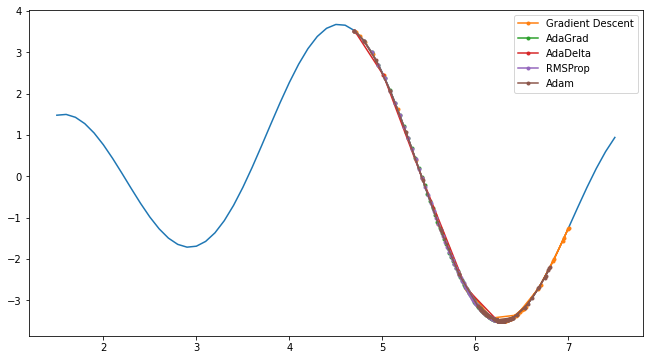

In [10]:
x = np.arange(1.5, 7.6, 0.1)
y = function(x)

plt.figure(figsize=(11, 6))
plt.plot(x, y)
plt.plot(xs_gd, ys_gd, '.-', label='Gradient Descent')
plt.plot(xs_ag, ys_ag, '.-', label='AdaGrad')
plt.plot(xs_ad, ys_ad, '.-', label='AdaDelta')
plt.plot(xs_rp, ys_rp, '.-', label='RMSProp')
plt.plot(xs_am, ys_am, '.-', label='Adam')
plt.legend()
plt.show()

### Creating Data (3D)

In [28]:
x = np.arange(1, 51) # input matrix
y = 2*x + 2          # true output or y_true

# mean squared error loss function
def mse(w, b):
    return sum((y - (w*x + b))**2)/len(x)

# mean squared error loss function partially differentiated w.r.t. weights and bias
def d_mse(w, b):
    return [
        -2*(x.T).dot(y - (w*x + b))/len(x), # w.r.t. weights
        -2*np.sum(y - (w*x + b))/len(x) # w.r.t. bias
    ]

In [29]:
x_init = [6, 6]

xs_gd, ys_gd, minimum_gd = GradientDescent(function=mse,
                                           d_function=d_mse,
                                           n_iter=150,
                                           learning_rate=0.00001,
                                           x_init=x_init,
                                           momentum=0.9
                                          )

xs_ag, ys_ag, minimum_ag = AdaGrad(function=mse,
                                   d_function=d_mse,
                                   n_iter=150,
                                   learning_rate=2,
                                   x_init=x_init,
                                   )

xs_ad, ys_ad, minimum_ad = AdaDelta(function=mse,
                                    d_function=d_mse,
                                    n_iter=150,
                                    x_init=x_init,
                                   )

xs_rp, ys_rp, minimum_rp = RMSProp(function=mse,
                                   d_function=d_mse,
                                   n_iter=150,
                                   learning_rate=0.1,
                                   x_init=x_init,
                                   )

xs_am, ys_am, minimum_am = Adam(function=mse,
                                   d_function=d_mse,
                                   n_iter=150,
                                   learning_rate=0.1,
                                   x_init=x_init,
                                   )

### Checking error made by each optimizer

In [30]:
def mse(y_true, y_pred):
    return sum((y_true - y_pred)**2)/len(y_true)

y_pred_gd = xs_gd[-1][0]*x + xs_gd[-1][1]
y_pred_ag = xs_ag[-1][0]*x + xs_ag[-1][1]
y_pred_ad = xs_ad[-1][0]*x + xs_ad[-1][1]
y_pred_rp = xs_rp[-1][0]*x + xs_rp[-1][1]
y_pred_am = xs_am[-1][0]*x + xs_am[-1][1]

print("Gradient Descent:", mse(y, y_pred_gd))
print("AdaGrad:", mse(y, y_pred_ag))
print("AdaDelta:", mse(y, y_pred_ad))
print("RMSProp:", mse(y, y_pred_rp))
print("Adam:", mse(y, y_pred_am))

Gradient Descent: 3.5995302577730506
AdaGrad: 2.1883383320140083e-21
AdaDelta: 4.1351214265473725e-10
RMSProp: 2.559089182562404e-19
Adam: 0.20981016556714152


# Visualization

<IPython.core.display.Javascript object>


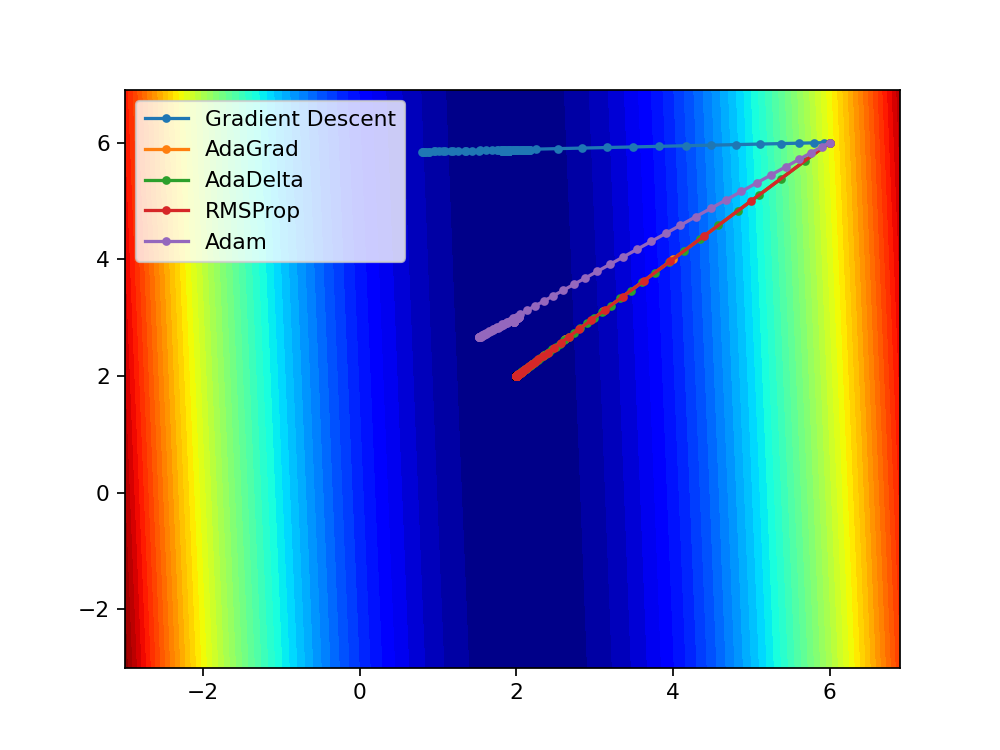

In [31]:
# calculating mse of every weights and bias in range (-3, 7)
rand_w, rand_b  = np.meshgrid(np.arange(-3, 7, 0.1), np.arange(-3, 7, 0.1))

loss = []
for w, b in zip(np.nditer(rand_w), np.nditer(rand_b)):
    y_pred = w*x + b
    loss.append(mse(y, y_pred))
loss = np.array(loss).reshape(rand_w.shape)

# calculating loss during every epoch of each optimizer
train_loss_gd = []
for w, b in xs_gd:
    y_pred = w*x + b
    train_loss_gd.append(mse(y, y_pred))

train_loss_ag = []
for w, b in xs_ag:
    y_pred = w*x + b
    train_loss_ag.append(mse(y, y_pred))

train_loss_ad = []
for w, b in xs_ad:
    y_pred = w*x + b
    train_loss_ad.append(mse(y, y_pred))
    
train_loss_rp = []
for w, b in xs_rp:
    y_pred = w*x + b
    train_loss_rp.append(mse(y, y_pred))
    
train_loss_am = []
for w, b in xs_rp:
    y_pred = w*x + b
    train_loss_am.append(mse(y, y_pred))

# Plotting with matplotlib
xs_gd = np.array(xs_gd)
xs_ag = np.array(xs_ag)
xs_ad = np.array(xs_ad)
xs_rp = np.array(xs_rp)
xs_am = np.array(xs_am)

plt.contourf(rand_w, rand_b, loss, levels=50, cmap='jet')
plt.plot(xs_gd[:, 0], xs_gd[:, 1], '.-', label='Gradient Descent')
plt.plot(xs_ag[:, 0], xs_ag[:, 1], '.-', label='AdaGrad')
plt.plot(xs_ad[:, 0], xs_ad[:, 1], '.-', label='AdaDelta')
plt.plot(xs_rp[:, 0], xs_rp[:, 1], '.-', label='RMSProp')
plt.plot(xs_am[:, 0], xs_am[:, 1], '.-', label='Adam')
plt.legend()
plt.show()

In [32]:
%matplotlib notebook

<IPython.core.display.Javascript object>


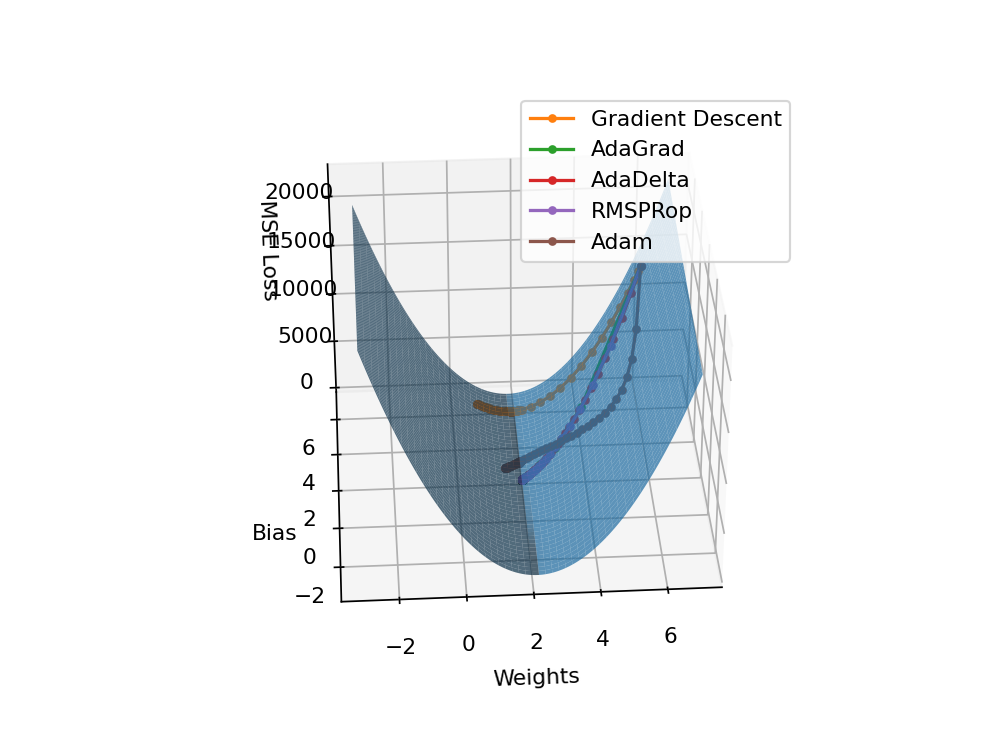

In [33]:
ax = plt.axes(projection='3d')
ax.set_xlabel('Weights')
ax.set_ylabel('Bias')
ax.set_zlabel('MSE Loss')
ax.plot_surface(rand_w, rand_b, loss, alpha=0.7)
ax.plot3D(xs_gd[:, 0], xs_gd[:, 1], train_loss_gd, '.-', label='Gradient Descent')
ax.plot3D(xs_ag[:, 0], xs_ag[:, 1], train_loss_ag, '.-', label='AdaGrad')
ax.plot3D(xs_ad[:, 0], xs_ad[:, 1], train_loss_ad, '.-', label='AdaDelta')
ax.plot3D(xs_rp[:, 0], xs_rp[:, 1], train_loss_rp, '.-', label='RMSPRop')
ax.plot3D(xs_am[:, 0], xs_am[:, 1], train_loss_am, '.-', label='Adam')
ax.legend()
plt.show()